<a href="https://colab.research.google.com/github/salvatorss/Oracle_Traning/blob/main/multiplelinearReg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import seaborn as sns

In [ ]:
data_url ='https://raw.githubusercontent.com/mwaskom/seaborn-data/master/mpg.csv'
df =pd.read_csv(data_url)

In [ ]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [ ]:
# Drop row with missing value and select some Features
df=df.dropna()
features =['horsepower', 'weight','displacement','acceleration','cylinders']
target = 'mpg'

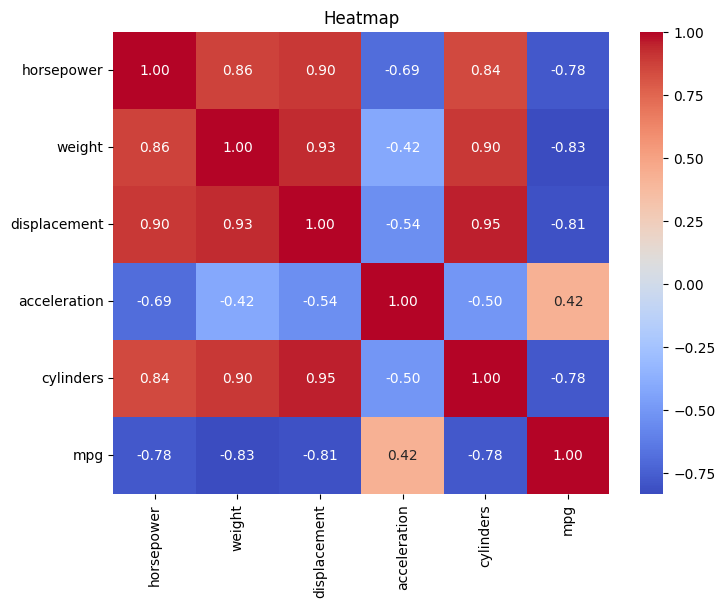

In [ ]:
#calculate_correlation matrix
correlation_matrix = df[features+[target]].corr()

#plotheatmap
plt.figure(figsize =(8,6))
sns.heatmap(correlation_matrix,annot =True, cmap ='coolwarm',fmt =".2f")
plt.title('Heatmap')
plt.show()

In [ ]:
#Select features from correlation matrix and use mpg as the target variable_type
X= df[['horsepower','weight','displacement','cylinders']].values
y=df['mpg'].values
#covert pantda series into np.array

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
model =LinearRegression()
#Train the model
model.fit(X_train,y_train)

LinearRegression()

In [ ]:
#make predicition on the test set
y_pred =model.predict(X_test)

In [ ]:
mse=mean_squared_error(y_test,y_pred)
print(F"Mean Squared Error:{mse:.2f}")

Mean Squared Error:17.89


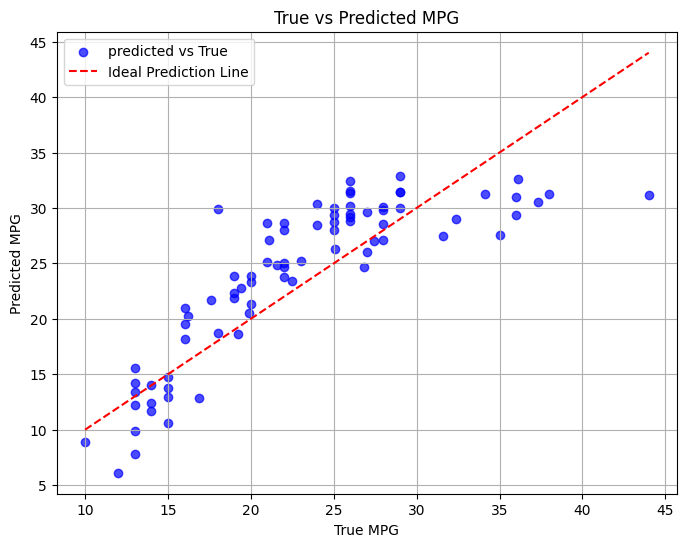

In [ ]:
#plot the true vs predict mpg
plt.figure(figsize=(8,6))
plt.scatter(y_test,y_pred,alpha=0.7,color='blue',label='predicted vs True')
plt.plot([min(y_test),max(y_test)],[min(y_test), max(y_test)],color='red',linestyle='--',label='Ideal Prediction Line')
plt.xlabel('True MPG')
plt.ylabel('Predicted MPG')
plt.title('True vs Predicted MPG')
plt.legend()
plt.grid(True)
plt.show()